In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)
engine.dispose()

In [4]:
#immunization related factors, mortality factors, economical factors, 
#and social factors.

In [5]:
#Your goal in this challenge is to find the factors that affect the life 
#expectancy. Specifically, you need to find out which factors increase 
#the expected life in the countries and which factors decrease it.

In [6]:
#nonsensical variables include percentage expenditure and there are some 
#variables like population that aren't consistent 

In [7]:
#nominal: Category and Status (social)
#interval: economical factors 
#ratio: mortality, social, and immunization 

In [8]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [9]:
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
#Getting the number of unique values for each column of our data frame 
#would help us decide which DataFrames might be categorical—if it's a 
#small number, then it's likely to be categorical.
life_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [11]:
#detecting missing values

In [12]:
life_df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#when .isunique isn't enough. .isunique is most effective with smaller data sets

In [14]:
for column_name in life_df.columns: 
        print("Unique values in column {} are: {}".format(column_name, life_df[column_name].unique()))

Unique values in column Country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [15]:
#nan in adult mortality, life expectancy, Hep B, Total expend., diphtheria, thinness 1-19, 
#Income, schooling

In [16]:
for column_name in ["Adult Mortality"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in life_df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: Adult Mortality


In [17]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [18]:
life_df.shape

(2938, 22)

In [19]:
#outliers

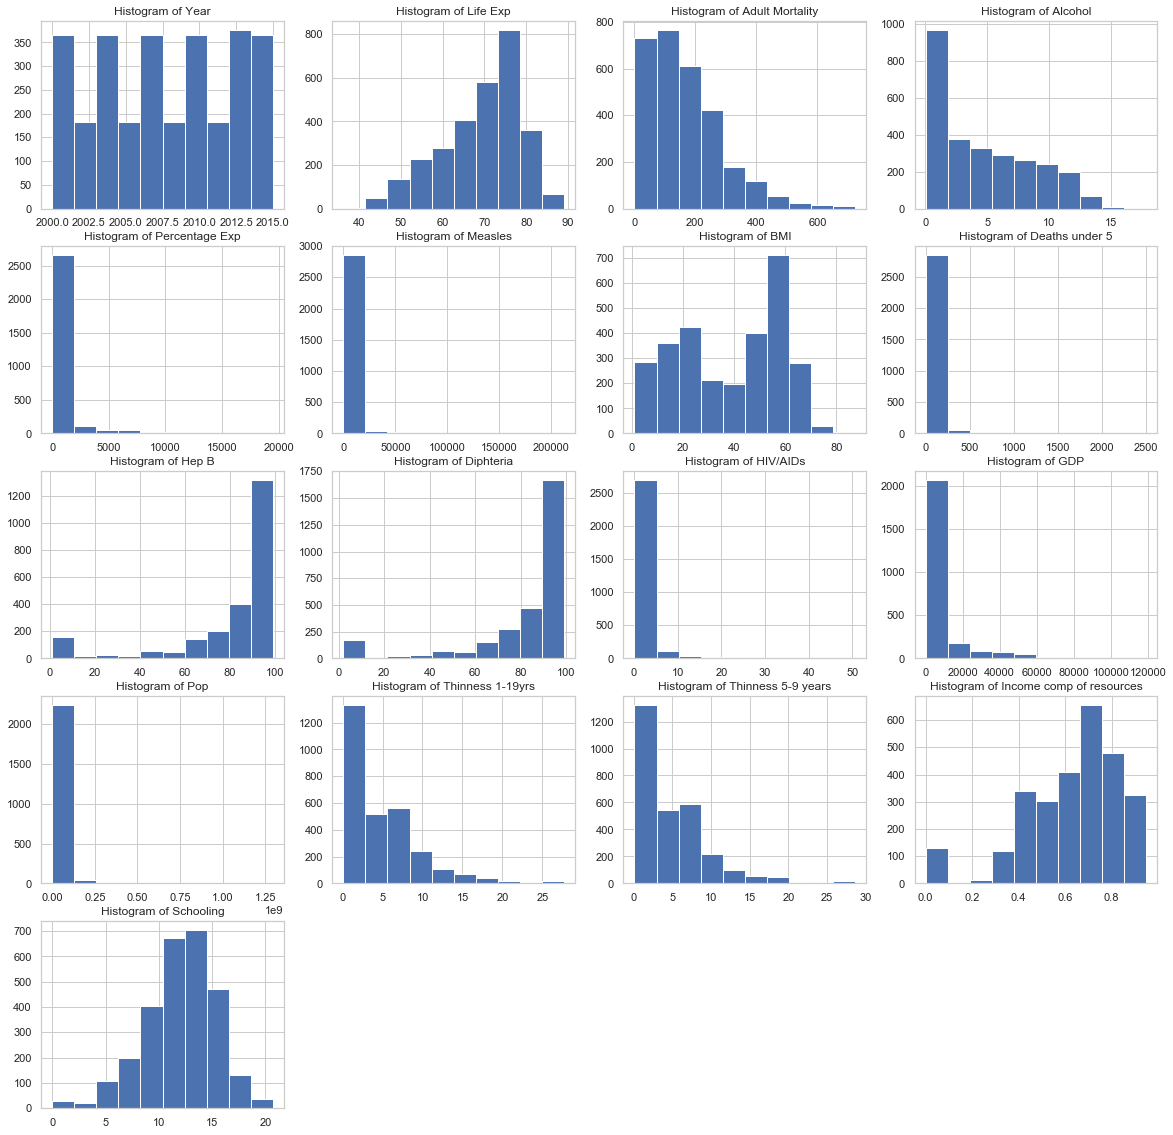

In [20]:
plt.figure(figsize = (20,20))

plt.subplot(5,4,1)
plt.hist((life_df["Year"]))
plt.title("Histogram of Year")

plt.subplot(5,4,2)
plt.hist((life_df["Life expectancy "]))
plt.title("Histogram of Life Exp")

plt.subplot(5,4,3)
plt.hist((life_df["Adult Mortality"]))
plt.title("Histogram of Adult Mortality")

plt.subplot(5,4,4)
plt.hist((life_df["Alcohol"]))
plt.title("Histogram of Alcohol")

plt.subplot(5,4,5)
plt.hist((life_df["percentage expenditure"]))
plt.title("Histogram of Percentage Exp")

plt.subplot(5,4,6)
plt.hist((life_df["Measles "]))
plt.title("Histogram of Measles")

plt.subplot(5,4,7)
plt.hist((life_df[" BMI "]))
plt.title("Histogram of BMI")

plt.subplot(5,4,8)
plt.hist((life_df["under-five deaths "]))
plt.title("Histogram of Deaths under 5")

plt.subplot(5,4,9)
plt.hist((life_df["Hepatitis B"]))
plt.title("Histogram of Hep B")

plt.subplot(5,4,10)
plt.hist((life_df["Diphtheria "]))
plt.title("Histogram of Diphteria")

plt.subplot(5,4,11)
plt.hist((life_df[" HIV/AIDS"]))
plt.title("Histogram of HIV/AIDs")

plt.subplot(5,4,12)
plt.hist((life_df["GDP"]))
plt.title("Histogram of GDP")

plt.subplot(5,4,13)
plt.hist((life_df["Population"]))
plt.title("Histogram of Pop")

plt.subplot(5,4,14)
plt.hist((life_df[" thinness  1-19 years"]))
plt.title("Histogram of Thinness 1-19yrs")

plt.subplot(5,4,15)
plt.hist((life_df[" thinness 5-9 years"]))
plt.title("Histogram of Thinness 5-9 years")

plt.subplot(5,4,16)
plt.hist((life_df["Income composition of resources"]))
plt.title("Histogram of Income comp of resources")

plt.subplot(5,4,17)
plt.hist((life_df["Schooling"]))
plt.title("Histogram of Schooling")

plt.show()


In [21]:
#outliers from histograms: Hep B, Diphetria, thinness 5-9, income comp of resources, percentage exp, adult mortality, death under 5

In [22]:
#treating outliers 
#Windsorizing by capping it at 90th percentile

In [23]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [36]:
from scipy.stats.mstats import winsorize

winsorized_views = winsorize(life_df["Hepatitis B"], (0, 0.10))
winsorized_views = winsorize(life_df["Diphtheria "], (0, 0.10))
winsorized_views = winsorize(life_df[" thinness 5-9 years"], (0, 0.10))
winsorized_views = winsorize(life_df["Income composition of resources"], (0, 0.10))
winsorized_views = winsorize(life_df["percentage expenditure"], (0, 0.10))
winsorized_views = winsorize(life_df["under-five deaths "], (0, 0.10))

winsorized_views

masked_array(data=[83, 86, 87, ..., 40, 39, 39],
             mask=False,
       fill_value=999999)

In [25]:
life_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [26]:
#drop variables with high correlations 80%, sign doesn't matter (they're the same)
#And drop variables with low correlations (no power in explanation)

In [27]:
#high correlation: deaths under 5:infant deaths; GDP:Percentage Exp; thinness 5-9:thinness1-19; 
#low correlation: year, total exp: adult mortality; total exp: HIV/AIDS, population, 
#relevant variables: schooling, Income comp of resources, Diphetheria, Polio, BMI, Measles, 
#Hep B, alcohol, infant deaths, adult mortality

In [28]:
#feature engineering variables

In [31]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [29]:
#transform variables into normal distributions
from scipy.stats import boxcox

In [34]:
for i in range(0, len(life_df.Status)):
    if pd.isnull(life_df.Status[i]):
        life_df.Status[i] = life_df.Status[i-1]
        
# one-hot encoding the Grade variable: 
pd.get_dummies(life_df["Status"])

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [35]:
#Also, keep in mind, just calling pd.get_dummies(youtube_df["Grade"]) won't store the dummies in the data frame; 
#you can append them to the data frame by using pd.concat(). 
#The axis = 1 parameter will concatenate the 2 DataFrames along the column:
life_df = pd.concat([life_df, pd.get_dummies(life_df["Status"])], axis=1)
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [30]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest


In [41]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

In [46]:
life_df['winsorized_hepb'] = winsorized_life = winsorize(life_df["Hepatitis B"], (0, 0.10))
life_df['winsorized_dip'] = winsorized_life = winsorize(life_df["Diphtheria "], (0, 0.10))
life_df['winsorized_fivetonine'] = winsorize(life_df[" thinness 5-9 years"], (0, 0.10))
life_df['winsorized_income'] = winsorize(life_df["Income composition of resources"], (0, 0.10))
life_df['winsorized_perexp'] = winsorize(life_df["percentage expenditure"], (0, 0.10))
life_df['winsorized_underfive'] = winsorize(life_df["under-five deaths "], (0, 0.10))

winsorized_views

masked_array(data=[83, 86, 87, ..., 40, 39, 39],
             mask=False,
       fill_value=999999)

In [50]:
from sklearn.preprocessing import scale

life_df["scaled_winsorized_hep"] = scale(life_df["winsorized_hepb"])
life_df["scaled_winsorized_dip"] = scale(life_df["winsorized_dip"])
life_df["scaled_winsorized_fivetonine"] = scale(life_df["winsorized_fivetonine"])
life_df["scaled_winsorized_income"] = scale(life_df["winsorized_income"])
life_df["scaled_winsorized_perexp"] = scale(life_df["winsorized_perexp"])
life_df["scaled_winsorized_underfive"] = scale(life_df["winsorized_underfive"])



In [49]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing', 'winsorized_hepb', 'winsorized_dip',
       'winsorized_fivetonine', 'winsorized_income', 'winsorized_perexp',
       'winsorized_underfive', 'scaled_winsorized_hep',
       'scaled_winsorized_dip', 'scaled_winsorized_fivetonine',
       'scaled_winsorized_income', 'scaled_winsorized_perexp'],
      dtype='object')

In [51]:
sw_hep_boxcox,_ = boxcox(life_df["scaled_winsorized_hep"])
sw_dip_boxcox,_ = boxcox(life_df["scaled_winsorized_dip"])
sw_fivenine_boxcox,_ = boxcox(life_df["scaled_winsorized_fivetonine"])
sw_income_boxcox,_ = boxcox(life_df["scaled_winsorized_income"])
sw_perexp_boxcox,_ = boxcox(life_df["scaled_winsorized_perexp"])
sw_underfive_boxcox,_ = boxcox(life_df["scaled_winsorized_underfive"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(sw_hep_boxcox)
plt.title("histogram of hep B (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(sw_dip_boxcox)
plt.title("histogram of winsorized diphetheria (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(sw_fivenine_boxcox)
plt.title("histogram of winsorized thinness five to nine (box-cox transformed)")

plt.subplot(1, 3, 1)
plt.hist(sw_income_boxcox)
plt.title("histogram of winsorized income (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(sw_perexp_boxcox)
plt.title("histogram of winsorized Per Expenditure (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(sw_underfive_boxcox)
plt.title("histogram of winsorized under5 (box-cox transformed)")

plt.show()

ValueError: Data must be positive.

In [ ]:
#Summary: 
#variables that I found that had high or low corrleation, and discarded included: 
##high correlation: deaths under 5:infant deaths; GDP:Percentage Exp; thinness 5-9:thinness1-19; 
#low correlation: year, total exp: adult mortality; total exp: HIV/AIDS, population, 
#relevant variables: schooling, Income comp of resources, Diphetheria, Polio, BMI, Measles, 
#Hep B, alcohol, infant deaths, adult mortality
#High correlation showed that the variables were likely telling the same thing, while low correlation
#likely showed that the variables were not related and have no effect on each other. 
#In the end, the variables that could be used in the model to explain life expectancy can be categorized as 
# social factors (education), mortality factors (Hep B, dipheteria, Measles) and then the status of the country
